<a href="https://colab.research.google.com/github/nv-hiep/ML/blob/main/Linear_Regression_Resampling_and_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resampling and Regularization

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Data

In [ ]:
datapath = 'Advertising.csv'
df = pd.read_csv(datapath, index_col=0)
print(df.shape)
print(df.columns)
df.head()

(200, 4)
Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
def scatter_plot(feature):
  plt.figure(figsize=(10,5))
  plt.scatter(df[feature], df['sales'])
  plt.xlabel(f"Money spent on {feature} ads [$]")
  plt.ylabel("Sales [k$]")
  plt.show()

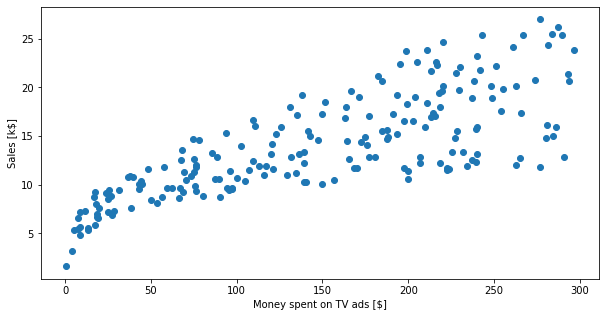

In [ ]:
scatter_plot('TV')

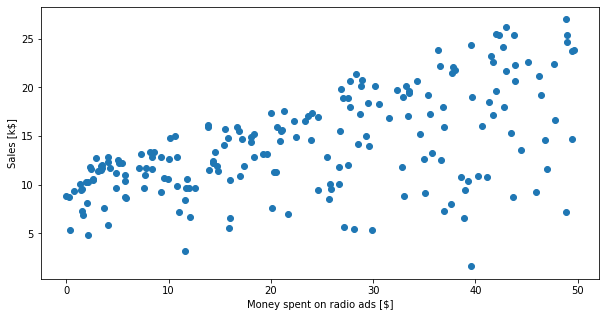

In [ ]:
scatter_plot('radio')

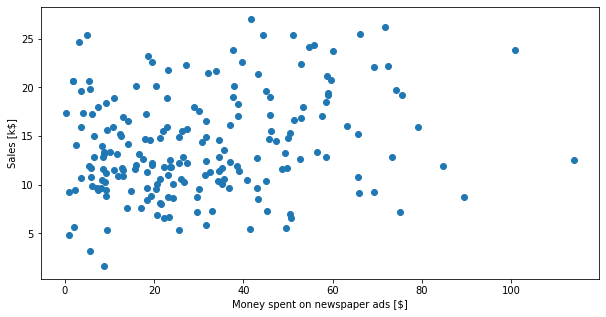

In [ ]:
scatter_plot('newspaper')

Money spent on Newspaper does not well correlate with Sales.

# Baseline model - simple multiple linear regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import  LinearRegression

In [ ]:
X = df.drop(['sales'], axis=1)
y = df['sales'].values.reshape(-1, 1)
print(X.shape)
print(y.shape)

(200, 3)
(200, 1)


In [ ]:
lin_reg = LinearRegression()

MSEs = cross_val_score(lin_reg,
                       X, y,
                       scoring='neg_mean_squared_error',
                       cv=5)

mean_MSE = -np.mean(MSEs)
mean_MSE

3.0729465971002106

# Regularization

## Ridge Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()

params = {'alpha' :
          [1e-12, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 0.1, 1, 5, 8, 10, 12, 15, 18, 20, 25, 28, 30]}

ridge_regressor = GridSearchCV(ridge, params,
                               scoring='neg_mean_squared_error',
                               cv=5)
ridge_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-12, 1e-10, 1e-08, 0.0001, 0.001, 0.01,
                                   0.1, 1, 5, 8, 10, 12, 15, 18, 20, 25, 28,
                                   30]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 30}
3.072536243856168


## Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(tol=0.05)

params = {'alpha' :
          [1e-12, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 0.1, 1, 5, 8, 10, 12, 15, 18, 20, 25, 28, 30]}

lasso_regressor = GridSearchCV(lasso, params,
                               scoring='neg_mean_squared_error',
                               cv=5)
lasso_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(tol=0.05),
             param_grid={'alpha': [1e-12, 1e-10, 1e-08, 0.0001, 0.001, 0.01,
                                   0.1, 1, 5, 8, 10, 12, 15, 18, 20, 25, 28,
                                   30]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)

{'alpha': 1}
3.035998320911191
